OBJECTIVE: Predict used-car sale price using Aritificial Neural Networks

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import tensorflow as tf
import sklearn.model_selection as train_test_split


In [49]:
car_dataset = pd.read_csv('/content/drive/MyDrive/MY_PROJECTS/KAGGLE/cars dataset/data.csv')

In [50]:
car_dataset.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [51]:
df = car_dataset.copy()

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [53]:
df.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [54]:
df.isnull().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

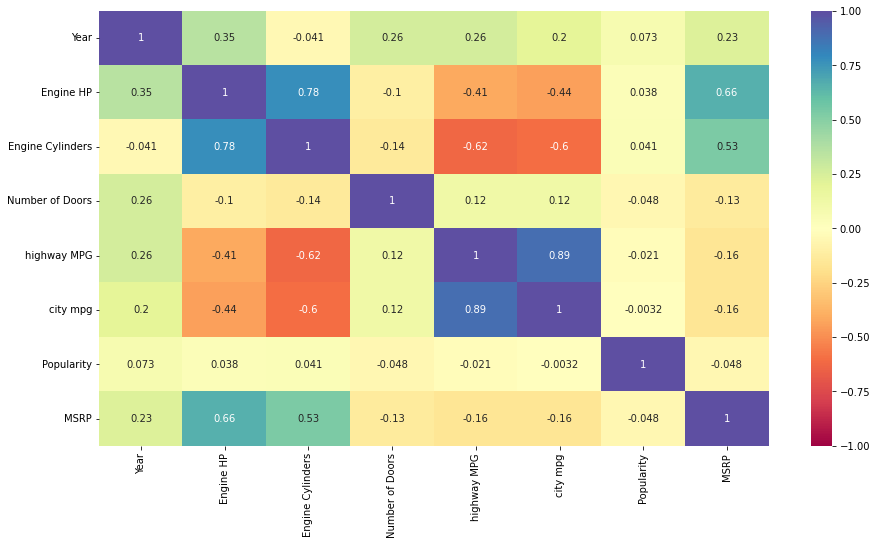

In [55]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='Spectral')

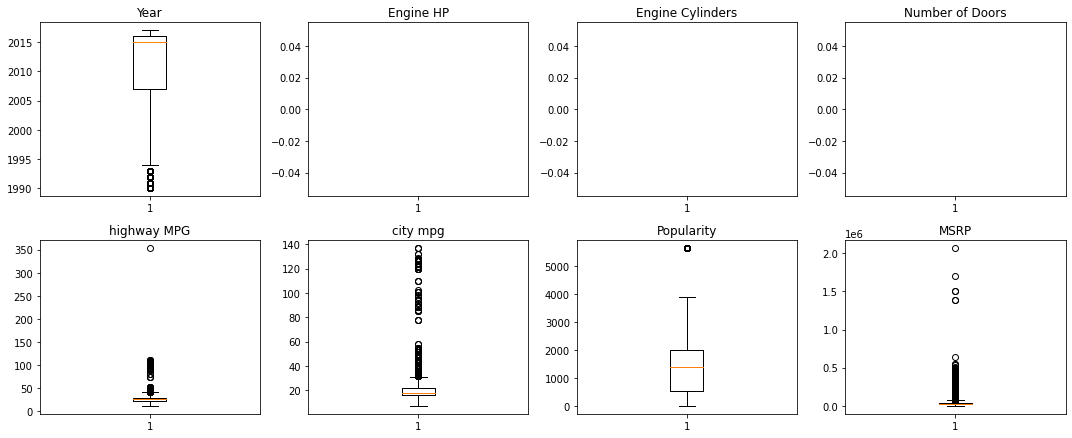

In [56]:
# outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcfa02f0a60>,
      dtype=object)

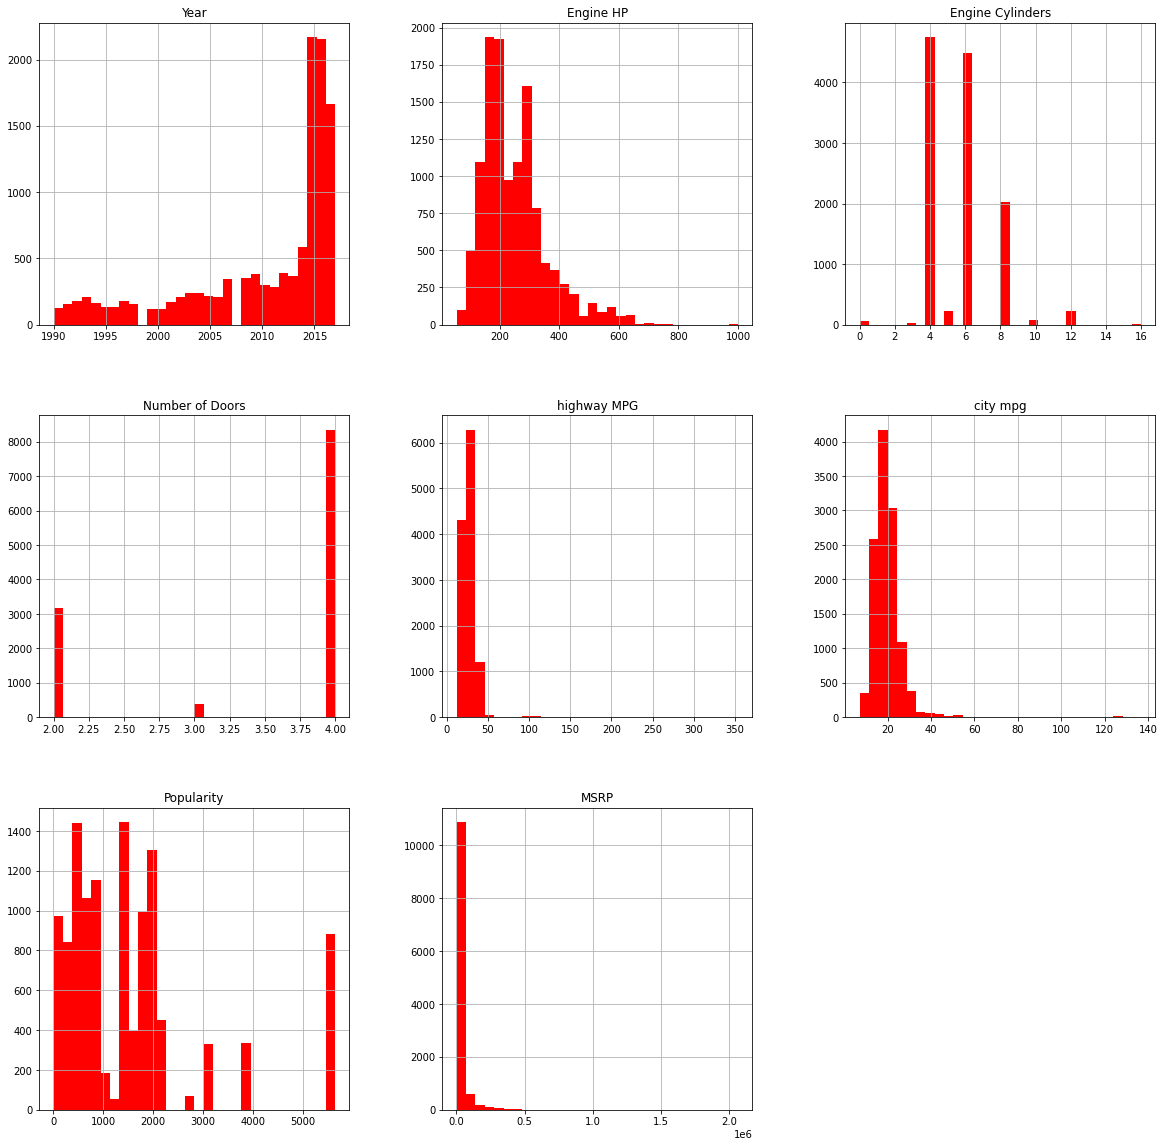

In [57]:
df.hist(bins=30, figsize=(20,20), color='red')

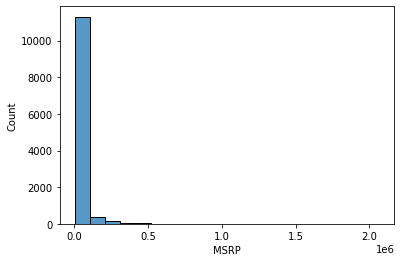

In [58]:
sns.histplot(df['MSRP'], bins=20)

In [59]:
df.dtypes

Make                  object
Model                 object
Year                   int64
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
dtype: object

In [60]:
df['Market Category'].fillna('Other', inplace=True)

In [61]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [62]:
for col in df.columns:
  if df[col].isnull().sum() == 0:
    continue
  
if df[col].dtype == object or df[col].dtype == bool or df[col].dtype == float:
    df[col] = df[col].fillna(df[col].mode()[0])
else:
    df[col] == df[col].fillna(df[col].mean())

In [63]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Market Category       0
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [64]:
df['Engine Fuel Type'].fillna('regular unleaded', inplace=True)

In [65]:
df['Engine HP'].fillna('mean', inplace=True)

In [66]:
df['Engine Cylinders'].fillna('mean', inplace=True)

In [67]:
df['Number of Doors'].fillna('mode', inplace=True)

In [68]:
df.isnull().sum()

Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

In [69]:
df.nunique()

Make                   48
Model                 915
Year                   28
Engine Fuel Type       10
Engine HP             357
Engine Cylinders       10
Transmission Type       5
Driven_Wheels           4
Number of Doors         4
Market Category        72
Vehicle Size            3
Vehicle Style          16
highway MPG            59
city mpg               69
Popularity             48
MSRP                 6049
dtype: int64

In [70]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Make,11914,48,Chevrolet,1123,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Model,11914,915,Silverado 1500,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,11914.0,NaN,NaN,NaN,2010.384338,7.57974,1990.0,2007.0,2015.0,2016.0,2017.0
Engine Fuel Type,11914,10,regular unleaded,7175,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine HP,11914.0,357.0,200.0,456.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine Cylinders,11914.0,10.0,4.0,4752.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission Type,11914,5,AUTOMATIC,8266,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Driven_Wheels,11914,4,front wheel drive,4787,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of Doors,11914.0,4.0,4.0,8353.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Market Category,11914,72,Other,3742,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
df.dtypes

Make                 object
Model                object
Year                  int64
Engine Fuel Type     object
Engine HP            object
Engine Cylinders     object
Transmission Type    object
Driven_Wheels        object
Number of Doors      object
Market Category      object
Vehicle Size         object
Vehicle Style        object
highway MPG           int64
city mpg              int64
Popularity            int64
MSRP                  int64
dtype: object

In [72]:
numerical_data = df.drop(['Make', 'Model', 'Engine Fuel Type','Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 
                         'Vehicle Size', 'Vehicle Style'], axis=1)
numerical_data.head()

,Year,highway MPG,city mpg,Popularity,MSRP
0,2011,26,19,3916,46135
1,2011,28,19,3916,40650
2,2011,28,20,3916,36350
3,2011,28,18,3916,29450
4,2011,28,18,3916,34500


In [73]:
categorical_data = df.filter(['Make', 'Model', 'Engine Fuel Type','Engine HP', 'Engine Cylinders', 'Transmission Type', 'Driven_Wheels', 'Number of Doors', 'Market Category', 
                         'Vehicle Size', 'Vehicle Style'], axis=1)
categorical_data.head()

,Make,Model,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style
0,BMW,1 Series M,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe
1,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible
2,BMW,1 Series,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe
3,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe
4,BMW,1 Series,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible


In [74]:
categorical_ohe = pd.get_dummies(categorical_data, drop_first=True)
categorical_ohe

,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,Make_Bugatti,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11911,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11912,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
final_dataset = pd.concat([numerical_data, categorical_ohe], axis=1)
final_dataset.head()

,Year,highway MPG,city mpg,Popularity,MSRP,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,Make_Bentley,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,26,19,3916,46135,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,2011,28,19,3916,40650,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2011,28,20,3916,36350,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2011,28,18,3916,29450,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,2011,28,18,3916,34500,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [76]:
final_dataset.isnull().sum()

Year                                0
highway MPG                         0
city mpg                            0
Popularity                          0
MSRP                                0
                                   ..
Vehicle Style_Passenger Minivan     0
Vehicle Style_Passenger Van         0
Vehicle Style_Regular Cab Pickup    0
Vehicle Style_Sedan                 0
Vehicle Style_Wagon                 0
Length: 1438, dtype: int64

In [77]:
final_dataset.dropna(inplace=True)

In [78]:
X = final_dataset.drop(['MSRP'], axis=1)
y = final_dataset['MSRP']

In [79]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=20)

In [28]:
from socket import socket
import os as os
socket
os

<module 'os' from '/usr/lib/python3.8/os.py'>

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [81]:
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

In [82]:
input_layer = Input(shape=(X.shape[1],))
dense_layer0 = Dense(100, activation='relu')(input_layer)
dense_layer1 = Dense(50, activation='relu')(dense_layer0)
dense_layer2 = Dense(25, activation='relu')(dense_layer1)
dense_layer3 = Dense(10, activation='relu')(dense_layer2)
dense_layer4 = Dense(5, activation='relu')(dense_layer3)
dense_layer5 = Dense(2, activation='relu')(dense_layer4)
output = Dense(1)(dense_layer5)

In [83]:
model = Model(inputs = input_layer, outputs=output)
model.compile(loss="mean_absolute_error", optimizer="adam", metrics=["mean_absolute_error"])

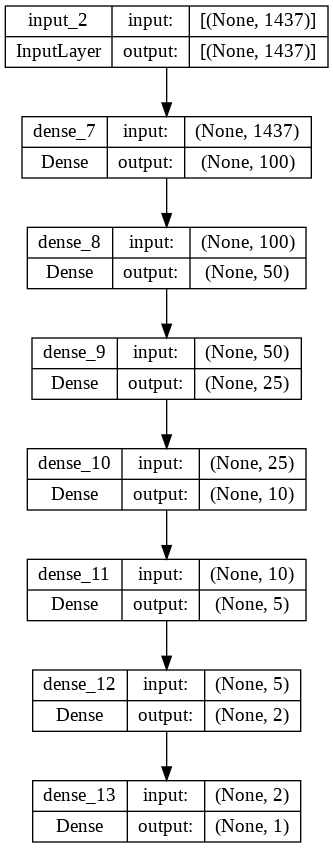

In [84]:
#plot showing all layers and the number of input and output from the layers
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [85]:
history = model.fit(X_train, y_train, batch_size=5, epochs=5, verbose=1, validation_split=0.2)

Epoch 1/5
1525/1525 [==============================] - 4s 2ms/step - loss: 27557.9668 - mean_absolute_error: 27557.9668 - val_loss: 20361.5781 - val_mean_absolute_error: 20361.5781
Epoch 2/5
1525/1525 [==============================] - 4s 2ms/step - loss: 19078.7285 - mean_absolute_error: 19078.7285 - val_loss: 16330.7783 - val_mean_absolute_error: 16330.7783
Epoch 3/5
1525/1525 [==============================] - 4s 2ms/step - loss: 16313.2344 - mean_absolute_error: 16313.2344 - val_loss: 14615.1221 - val_mean_absolute_error: 14615.1230
Epoch 4/5
1525/1525 [==============================] - 4s 3ms/step - loss: 14632.0967 - mean_absolute_error: 14632.0967 - val_loss: 13238.3975 - val_mean_absolute_error: 13238.3975
Epoch 5/5
1525/1525 [==============================] - 4s 2ms/step - loss: 13531.6924 - mean_absolute_error: 13531.6924 - val_loss: 12544.0312 - val_mean_absolute_error: 12544.0312


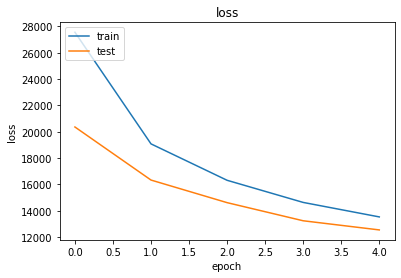

In [86]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [87]:
y_pred = model.predict(X_test)

75/75 [==============================] - 0s 2ms/step


In [88]:
from sklearn import metrics

print('Mean Absolute Error:' , metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:' , metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:' , np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12852.564710379347
Mean Squared Error: 2002653117.7562118
Root Mean Squared Error: 44751.01247744247


In [89]:
df['MSRP'].mean()

40594.737032063116

In [90]:
comparison_df = pd.DataFrame({'Actual': y_test.values.tolist(), 'Predicted': y_pred.tolist()})
comparison_df

,Actual,Predicted
0,2000,[3734.31201171875]
1,21475,[23326.796875]
2,2000,[2031.67041015625]
3,37320,[38934.80078125]
4,16270,[16527.361328125]
...,...,...
2378,75970,[78118.9296875]
2379,28915,[25282.736328125]
2380,72900,[82416.109375]
2381,35940,[35081.3984375]


In [91]:
X_test[1].shape


(1437,)

In [92]:
single_point = X_test[1].reshape(1,-1)
single_point.shape

(1, 1437)

In [93]:
model.predict(X_test[1].reshape(1,-1))

1/1 [==============================] - 0s 14ms/step


array([[23326.8]], dtype=float32)

In [94]:
y_test.values[1]

21475

The model predicted 23,326.00
The actual price was 21,475.00